In [1]:
# Imports and variables
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

from config import Config
import utils
import model as modellib
import visualize
from model import log

from idrid import IdridConfig, IdridDataset


# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_idrid.h5") #Duplicate path for easy access

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load training and validation dataset
dataset_train = IdridDataset()
dataset_train.load_idrid('train')
dataset_train.prepare()

dataset_val = IdridDataset()
dataset_val.load_idrid('val')
dataset_val.prepare()

100%|██████████| 9/9 [00:00<00:00, 55269.01it/s]


In [3]:
# Load config
config = IdridConfig()

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


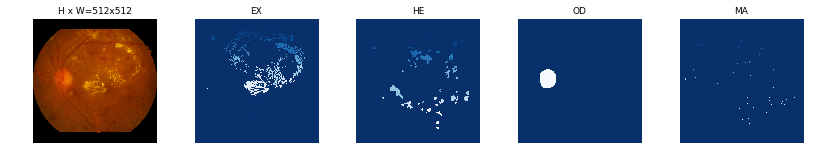

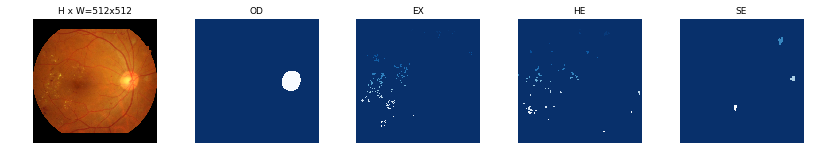

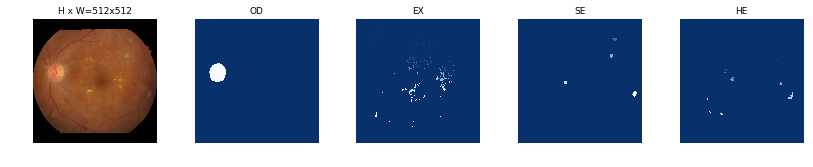

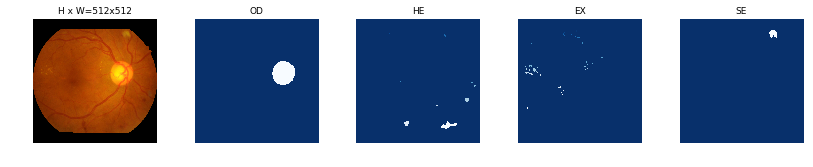

In [4]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [5]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                      model_dir=MODEL_DIR)

In [8]:
#Load weights
last_weights_path = model_path = model.find_last()[1]
if last_weights_path is not None and os.path.exists(last_weights_path):
    model.load_weights(last_weights_path)
    print("Loading previous weights from " + last_weights_path)
else:
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
    print("Loading previous weights from COCO")

NameError: name 'COCO_MODEL_PATH' is not defined

In [ ]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=5, 
            layers='all')

In [ ]:
# Save weights
model.keras_model.save_weights(MODEL_WEIGHTS_PATH)